In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

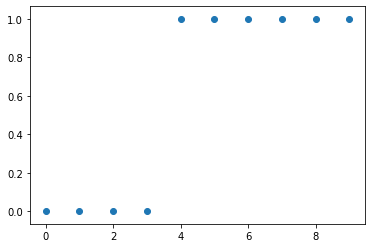

In [16]:
x = np.arange(0, 10)
y = int(len(x)/2)*[0] + int(len(x)/2)*[1]
y = 4*[0] + 6*[1]
plt.scatter(x, y)
y = np.array(y).reshape(-1,1)
x = x.reshape(-1, 1)

In [52]:
iris = load_iris()
x = iris.data[:, :2]
y = (iris.target != 0) * 1
df = pd.DataFrame(data=[np.ones(shape=y.shape), x[:,0],x[:,1], y]).T
df.columns = ['intercept', 'x1', 'x2', 'target']
df.head(2)

,intercept,x1,x2,target
0,1.0,5.1,3.5,0.0
1,1.0,4.9,3.0,0.0


In [53]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=500000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            # print(gradient)
            # print(gradient.shape)
            self.theta -= self.lr * gradient
            
            # if(i % 10000 == 0):
            #     z = np.dot(X, self.theta)
            #     h = self.__sigmoid(z)
            #     print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [33]:
model = LogisticRegression(lr=0.1, num_iter=500000)
%time model.fit(x, y)

Wall time: 8.54 s


In [34]:
model.theta

array([-32.06475869,  14.56129531, -14.90101592])

## Build Using Sklearn

In [56]:
import statsmodels.api as sm
logit_model=sm.Logit(df['target'], df[['intercept','x1', 'x2']])
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.000000
         Iterations: 35
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   1.000      
Dependent Variable:    target             AIC:                6.0000     
Date:                  2020-06-15 12:26   BIC:                15.0319    
No. Observations:      150                Log-Likelihood:     -7.5605e-08
Df Model:              2                  LL-Null:            -95.477    
Df Residuals:          147                LLR p-value:        3.4262e-42 
Converged:             0.0000             Scale:              1.0000     
No. Iterations:        35.0000                                           
-------------------------------------------------------------------------
            Coef.     Std.Err.     z    P>|z|      [0.025       0.975]   
-------------------------------------------------------------------------
intercept -436.7700 543116.7740 -0.0008 0.9994 -1064926.0864 1064052.5464
x1

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x, y)
print(model.intercept_[0], model.coef_)

-8.323303886430972 [[ 3.38829757 -3.1645277 ]]


## Using Gradient Descent

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
class LogisticRegression(lr, x, y, iterations):
    def __init__(self):
        super().__init__()
        self.lr = lr
        self.x = x.reshape(-1,1)
        self.y = y.reshape(-1,1)
        self.iterations = iterations
        self.X = concat()
        self.theta = np.zeros(shape=self.X.shape[1]).reshape(-1,1)

    def __concat():
        bias = np.ones(shape=self.x.shape[1])
        self.X = np.concatenate((bias, self.x), axis= 1)

    def __sigmoid(val):
        return 1/(1+np.exp(-val))    
    
    def perform_iterations():
        n = len(self.x)
        for epoch in np.arange(self.iterations):        
            self.y = np.array(self.y).reshape(-1,1)
            sig = (self.y - sigmoid(self.X@self.theta))
            grad = sig.T@self.X/n
            self.theta = self.theta + self.lr*grad.T
            loss_i = self.y.T@np.log(sigmoid(self.X@self.theta)) + (1 - self.y).T@np.log(1 - sigmoid(self.X@self.theta))
            loss.append(loss_i[0,0])
        return loss, self.theta

In [ ]:
alpha = 0.09
n = len(x)
x = x.reshape(-1, 1)
X = np.concatenate((np.ones(shape=x.shape), x), axis=1)
theta = np.zeros(shape=X.shape[1]).reshape(-1,1)

iterations = 5000
loss = []
for epoch in np.arange(iterations):
    y = np.array(y).reshape(-1,1)
    sig = (y - sigmoid(X@theta))
    grad = sig.T@X/n
    theta = theta + alpha*grad.T
    loss_i = y.T@np.log(sigmoid(X@theta)) + (1 - y).T@np.log(1 - sigmoid(X@theta))
    loss.append(loss_i[0,0])
print(theta)
plt.plot(np.arange(iterations), loss)